In [ ]:
from google.colab import drive
  
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tqdm

from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns
import sklearn
import scipy
from scipy.stats import spearmanr , pointbiserialr
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import math
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score
import matplotlib.pyplot as plt
from string import punctuation
import random
import scipy
from scipy.stats import spearmanr , pointbiserialr
from collections import Counter
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Set

In [ ]:
data_file_name ="/content/drive/MyDrive/Colab Notebooks/CVision/FinalProject_part1_dataset.csv"
features = ['App Name', 'Category', 'Rating', 'Reviews', 'Installs', 'Size',
       'Price', 'Content Rating', 'Game_genre'] 
dataset = pd.read_csv(data_file_name)

In [ ]:
print("Data : {}\n".format(dataset.shape))
print("Data colums :\n\n {}".format(dataset.columns))
dataset.head()

Data : (16488, 12)

Data colums :

 Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOG_sbrCnu0wRH51BoojyG2l9kL95QWpBJ7aC5W...,SirH3nry,https://play-lh.googleusercontent.com/a-/AOh14...,I use reminder apps for one thing: daily remin...,1,11,5.13.0.9,2021-03-23 17:32:43,The way Recurring Reminders work is that when ...,2021-03-24 09:52:03,most_relevant,com.anydo
1,gp:AOqpTOGogprOZWoMGnVn_mzQOAPaSfgB4ZZs1AhHXzE...,Steve Clancy,https://play-lh.googleusercontent.com/a-/AOh14...,"I am so tired of the constant ""helpful"" notifi...",1,5,5.12.1.1,2021-03-18 16:14:18,You can disable any notifications you don't li...,2021-03-21 10:17:41,most_relevant,com.anydo
2,gp:AOqpTOEzFNt68Pau8IeHhpKZa-zUJgpW4g59wB9SmqY...,BreAnn Happ,https://play-lh.googleusercontent.com/a-/AOh14...,"Love it! But when I start writing a task, and ...",1,17,5.12.1.1,2021-03-18 09:29:32,Please note that in order to make sure that su...,2021-03-21 10:06:14,most_relevant,com.anydo
3,gp:AOqpTOH1svJ6WlbEzBJao-Z-bPslFlNlOmcKbf585YY...,Fiat Justicia,https://play-lh.googleusercontent.com/a-/AOh14...,1)Notes take too long to sync!! 2)Can't see th...,1,2,5.13.0.9,2021-03-28 01:26:32,"Hi Fiat, please note that we have an extensive...",2021-03-29 08:51:05,most_relevant,com.anydo
4,gp:AOqpTOFIEKcKU1pFc0FJrQAsnGOIp8kQ4GYmMc93LWf...,David Sarnoff,https://play-lh.googleusercontent.com/-R53V40b...,Keep getting (for the last month or so) the me...,1,2,5.13.0.9,2021-03-24 07:50:57,We're sorry to hear you're experiencing issues...,2021-03-24 10:03:55,most_relevant,com.anydo


# PreProccessing and Visualization

Number of Contents per score


3    5246
5    3000
4    2866
1    2762
2    2614
Name: score, dtype: int64

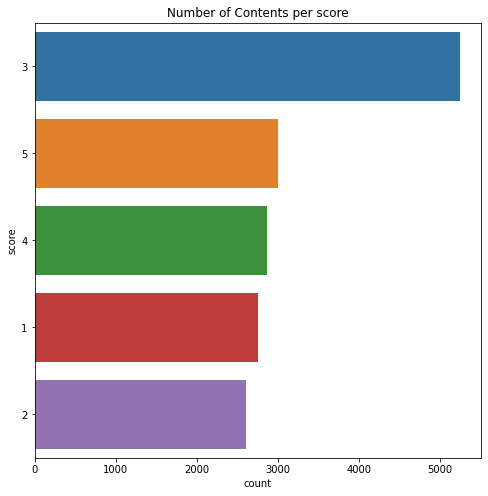

In [ ]:
print('Number of Contents per score')
display(dataset.score.value_counts())
fig=plt.figure(figsize=(8, 8))
a = sns.countplot(y = dataset.score,order = dataset.score.value_counts().index, data = dataset).set_title('Number of Contents per score')

In [ ]:
def preprocessing_content(X):
  documents = []
  lemmatizer= WordNetLemmatizer()
  stemmer= PorterStemmer()
  stop_words = set(stopwords.words('english'))
  for sen in range(0, len(X)):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))
      
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
      
      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
      
      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)
      
      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)
      
      # Converting to Lowercase
      document = document.lower()
      
      document = word_tokenize(document)
      
      # Lemmatization
      # document = [lemmatizer.lemmatize(word) for word in document]

      #stopword
      document = [i for i in document if not i in stop_words]
      
      documents.append(document)
  print(documents)
  return documents


In [ ]:
processed_text = preprocessing_content(dataset['content'])

[['use', 'reminder', 'apps', 'one', 'thing', 'daily', 'reminders', 'happen', 'time', 'every', 'day', 'years', 'straight', 'miss', 'one', 'daily', 'reminders', 'big', 'deal', 'imagine', 'frustrated', 'become', 'one', 'daily', 'reminders', 'stops', 'notifying', 'happens', 'every', 'months', 'end', 'delete', 'repeating', 'reminder', 'create', 'anew', 'switched', 'built', 'google', 'reminders', 'problem', 'disappointed', 'app', 'overcome', 'challenge'], ['tired', 'constant', 'helpful', 'notifications', 'want', 'plan', 'day', 'want', 'reminded', 'buy', 'grocery', 'item', 'notifications', 'ok', 'option', 'turn', 'note', 'software', 'developers', 'assume', 'want', 'everyone', 'wants'], ['love', 'start', 'writing', 'task', 'switch', 'apps', 'go', 'back', 'writing', 'task', 'progress', 'subpanel', 'closed', 'task', 'save', 'current', 'state', 'likewise', 'writing', 'subtask', 'completing', 'switch', 'apps', 'options', 'subpanel', 'still', 'open', 'back', 'lose', 'subtasks', 'subpanel', 'must', 

# Word Embedding

In [ ]:
def dummy_fun(doc):
    return doc
def tfidf(data, ma = 0.6, mi = 0.0001):
    tfidf_vectorize = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    max_df = ma,
    min_df = mi) 
    tfidf_data = tfidf_vectorize.fit_transform(data)
    return tfidf_data

In [ ]:
word_embedded_text = tfidf(processed_text)
print(word_embedded_text.shape)

(16488, 8127)


# Train Test split

In [ ]:
def split_data(dataset_features, labels):
  # train 0.6 , test = 0.2 , val = 0.2
  x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(dataset_features, labels, test_size=0.2)
  # x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2
  print("X_train lenght: {}".format(x_train.shape[0]))
  print("X_test lenght: {}".format(x_test.shape[0]))
  # print("X_val lenght: {}".format(x_test.shape[0]))
  return x_train, x_test, y_train, y_test 

In [ ]:
labels = dataset['score']
x_train, x_test, y_train, y_test = split_data(word_embedded_text, labels)

X_train lenght: 13190
X_test lenght: 3298


# model

## Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import ReduceLROnPlateau
def logistic_regression_model(x_train, x_test, y_train, y_test):

    model = Pipeline([ ('clf', LogisticRegression(n_jobs = 1 , C = 1e5))])
    classifier = model.fit(x_train,y_train)
    predictions = classifier.predict(x_test)
    print(classification_report(y_test, predictions))

    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(classifier, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
    plt.show()

    return 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.68      0.66      0.67       552
           2       0.60      0.62      0.61       554
           3       0.63      0.69      0.66      1011
           4       0.63      0.56      0.59       607
           5       0.69      0.66      0.68       574

    accuracy                           0.64      3298
   macro avg       0.65      0.64      0.64      3298
weighted avg       0.65      0.64      0.64      3298



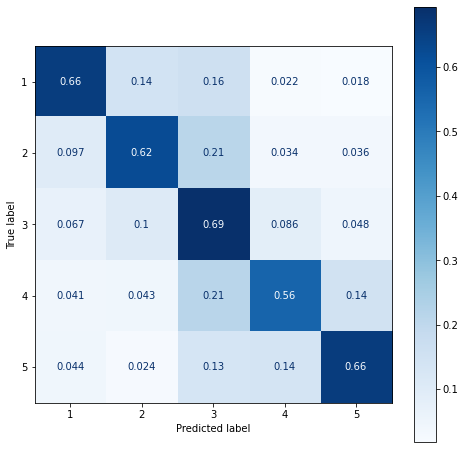

In [ ]:
logistic_regression_model(x_train, x_test, y_train, y_test)

## SVM

In [ ]:
from sklearn.svm import SVC
def svm_model(x_train, x_test, y_train, y_test):
  svclassifier = SVC(kernel='linear')
  svclassifier.fit(x_train, y_train)
  y_pred = svclassifier.predict(x_test)
  cm = confusion_matrix(y_test,y_pred)
  print(classification_report(y_test,y_pred))

  fig, ax = plt.subplots(figsize=(8, 8))
  plot_confusion_matrix(svclassifier, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
  plt.show()
  return

              precision    recall  f1-score   support

           1       0.59      0.59      0.59       523
           2       0.55      0.30      0.38       558
           3       0.51      0.74      0.60      1022
           4       0.55      0.36      0.43       601
           5       0.69      0.70      0.70       594

    accuracy                           0.56      3298
   macro avg       0.58      0.54      0.54      3298
weighted avg       0.57      0.56      0.55      3298



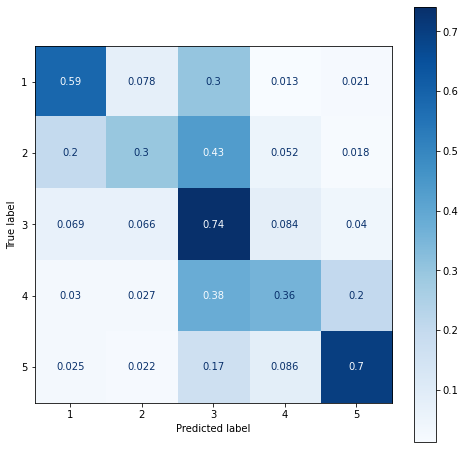

In [ ]:
svm_model(x_train, x_test, y_train, y_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def knn_model(x_train, x_test, y_train, y_test):
  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test,y_pred)

  fig, ax = plt.subplots(figsize=(8, 8))
  plot_confusion_matrix(classifier, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
  plt.show()
  return

              precision    recall  f1-score   support

           1       0.28      0.46      0.35       523
           2       0.36      0.26      0.30       558
           3       0.49      0.32      0.39      1022
           4       0.41      0.18      0.25       601
           5       0.28      0.51      0.36       594

    accuracy                           0.34      3298
   macro avg       0.36      0.35      0.33      3298
weighted avg       0.38      0.34      0.34      3298



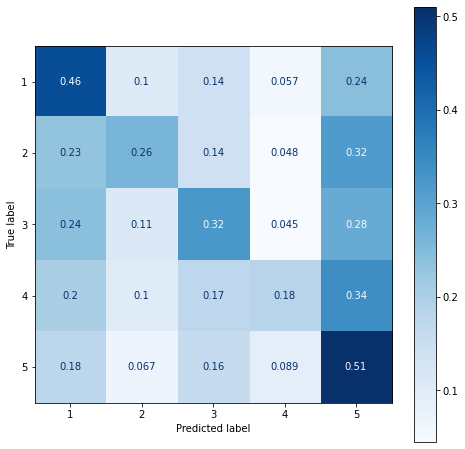

In [ ]:
knn_model(x_train, x_test, y_train, y_test)

## Clustering (K means)

In [ ]:
def Kmeans(x_train, x_test, y_train, y_test):
        n_clusters = len(np.unique(y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(x_train)
        y_pred = clf.predict(x_test)
        y_pred_new = [y+1 for y in y_pred]
        cm = confusion_matrix(y_test,y_pred)
        print(classification_report(y_test,y_pred))
        print(cm)
        return

In [ ]:
Kmeans(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.00      0.00       523
           2       0.16      0.15      0.15       558
           3       0.35      0.02      0.04      1022
           4       0.30      0.14      0.19       601
           5       0.00      0.00      0.00       594

    accuracy                           0.06      3298
   macro avg       0.14      0.05      0.06      3298
weighted avg       0.20      0.06      0.07      3298

[[  0   0   0   0   0   0]
 [443   1  64   2  13   0]
 [450   1  83   5  19   0]
 [785   7 169  23  38   0]
 [371   6 120  22  82   0]
 [363   8  92  14 117   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3 Class classification

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.62      0.64      0.63       523
           2       0.58      0.53      0.55       558
           3       0.60      0.63      0.61      1022
           4       0.52      0.50      0.51       601
           5       0.68      0.66      0.67       594

    accuracy                           0.60      3298
   macro avg       0.60      0.59      0.60      3298
weighted avg       0.60      0.60      0.60      3298



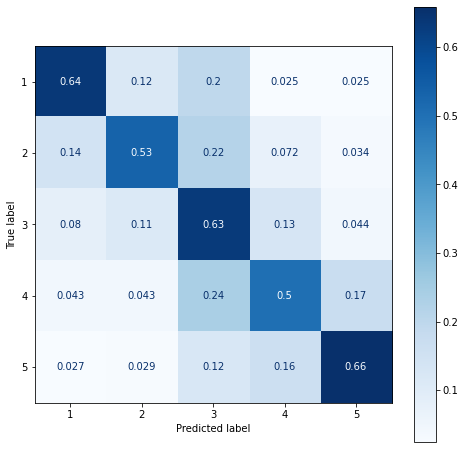

In [ ]:
logistic_regression_model(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.59      0.59      0.59       523
           2       0.55      0.30      0.38       558
           3       0.51      0.74      0.60      1022
           4       0.55      0.36      0.43       601
           5       0.69      0.70      0.70       594

    accuracy                           0.56      3298
   macro avg       0.58      0.54      0.54      3298
weighted avg       0.57      0.56      0.55      3298



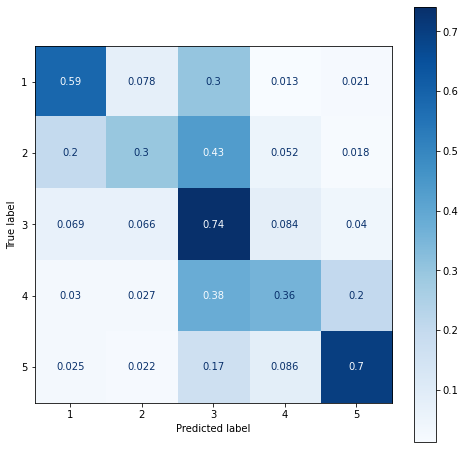

In [ ]:
svm_model(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           1       0.28      0.46      0.35       523
           2       0.36      0.26      0.30       558
           3       0.49      0.32      0.39      1022
           4       0.41      0.18      0.25       601
           5       0.28      0.51      0.36       594

    accuracy                           0.34      3298
   macro avg       0.36      0.35      0.33      3298
weighted avg       0.38      0.34      0.34      3298



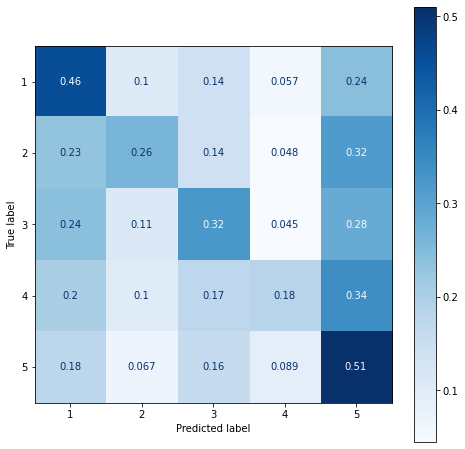

In [ ]:
knn_model(x_train, x_test, y_train, y_test)

In [ ]:
Kmeans(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.00      0.00       523
           2       0.16      0.15      0.15       558
           3       0.35      0.02      0.04      1022
           4       0.30      0.14      0.19       601
           5       0.00      0.00      0.00       594

    accuracy                           0.06      3298
   macro avg       0.14      0.05      0.06      3298
weighted avg       0.20      0.06      0.07      3298

[[  0   0   0   0   0   0]
 [443   1  64   2  13   0]
 [450   1  83   5  19   0]
 [785   7 169  23  38   0]
 [371   6 120  22  82   0]
 [363   8  92  14 117   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
